In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.vision import *
from fastai.vision.gan import *

In [4]:
path = 'data/lsun/bedroom'

In [5]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
            .no_split()
            .label_from_func(noop)
            .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
            .databunch(bs=bs)
            .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True)
           )
    

In [6]:
data = get_data(128, 64)

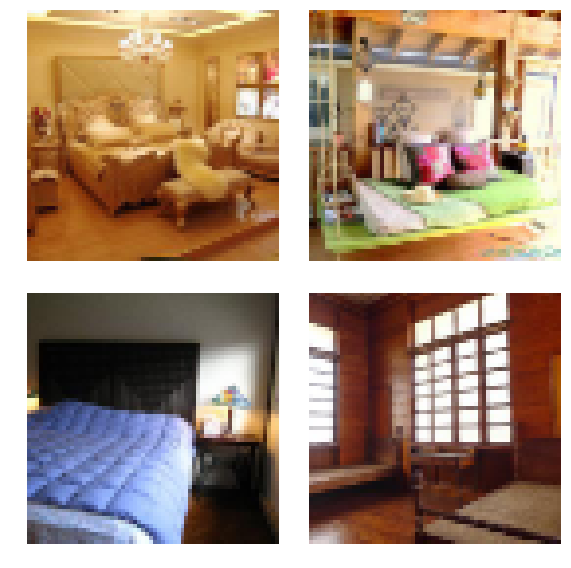

In [7]:
data.show_batch(rows=2)

In [8]:
generator = basic_generator(in_size=64, n_channels=3, noise_sz=100, n_extra_layers=1)
critic = basic_critic(in_size=64, n_channels=3, n_extra_layers=1)

In [9]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), wd=0.)


In [11]:
data

ImageDataBunch;

Train: LabelList
y: ImageItemList (303125 items)
[Image (3, 256, 343), Image (3, 256, 455), Image (3, 335, 256), Image (3, 256, 262), Image (3, 256, 384)]...
Path: data/lsun/bedroom
x: GANItemList (303125 items)
[NoisyItem , NoisyItem , NoisyItem , NoisyItem , NoisyItem ]...
Path: data/lsun/bedroom;

Valid: LabelList
y: ImageItemList (0 items)
[]...
Path: data/lsun/bedroom
x: GANItemList (0 items)
[]...
Path: data/lsun/bedroom;

Test: None

In [1]:
??GANLearner.wgan()

Object `GANLearner.wgan` not found.


epoch,train_loss,gen_loss,disc_loss
1,-0.754004,0.494804,-0.988096
2,-0.658438,0.482195,-0.884062
3,-0.622133,0.470953,-0.854432
4,-0.633278,0.434353,-0.832650
5,-0.597125,0.413898,-0.799082
6,-0.521709,0.377519,-0.709563
7,-0.514602,0.364886,-0.681423
8,-0.464719,0.338856,-0.629892
9,-0.429125,0.312411,-0.589457
10,-0.401889,0.275044,-0.534408


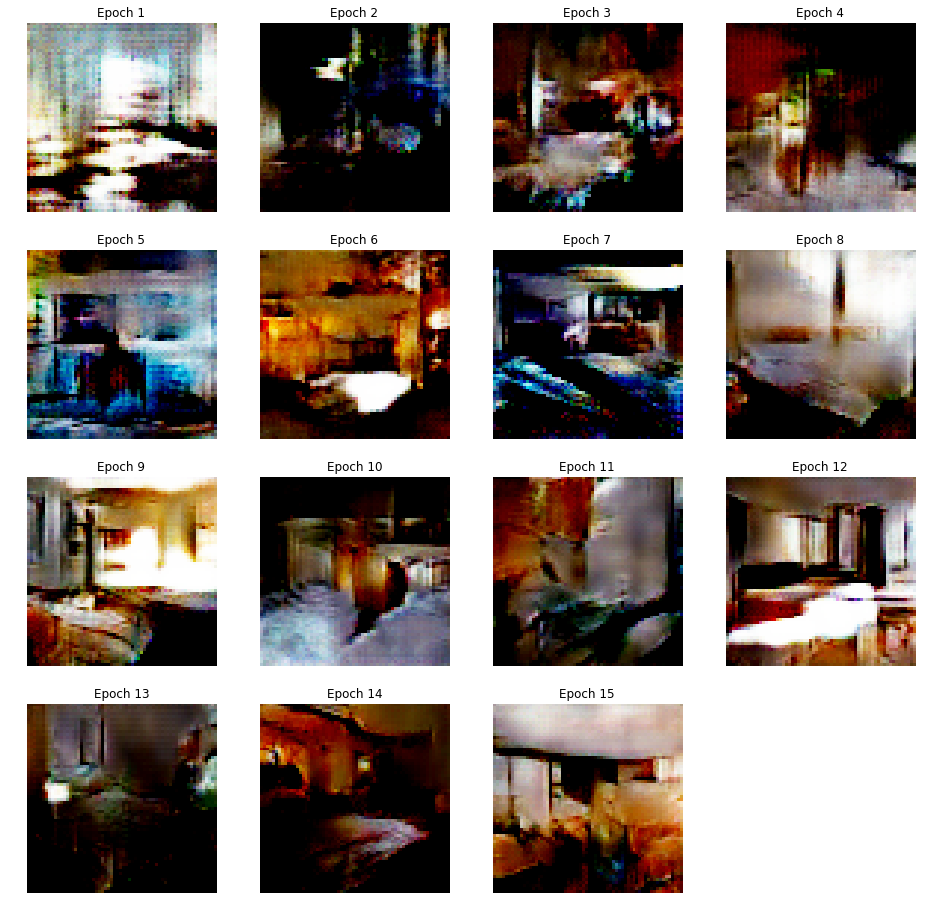

In [10]:
learn.fit(15, 2e-4)